<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_35_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2022.Q2]**
Prof. Alexandre Donizeti Alves

### **Modelo BERT QA em Português** 
----

Um modelo QA é um modelo de linguagem natural (BERT, por exemplo) adaptado à tarefa de responder a perguntas, ou seja, um modelo capaz de extrair de um texto (o contexto) a sequência de palavras que constitui a resposta a uma pergunta.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.2 MB/s 
     |████████████████████████████████| 101 kB 11.5 MB/s 
     |████████████████████████████████| 6.6 MB 37.7 MB/s 
     |████████████████████████████████| 596 kB 73.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers
from transformers import pipeline

In [ ]:
# source: https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19
context = r"""
A pandemia de COVID-19, também conhecida como pandemia de coronavírus, é uma pandemia em curso de COVID-19, 
uma doença respiratória causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2). 
O vírus tem origem zoonótica e o primeiro caso conhecido da doença remonta a dezembro de 2019 em Wuhan, na China. 
Em 20 de janeiro de 2020, a Organização Mundial da Saúde (OMS) classificou o surto 
como Emergência de Saúde Pública de Âmbito Internacional e, em 11 de março de 2020, como pandemia. 
Em 18 de junho de 2021, 177 349 274 casos foram confirmados em 192 países e territórios, 
com 3 840 181 mortes atribuídas à doença, tornando-se uma das pandemias mais mortais da história.
Os sintomas de COVID-19 são altamente variáveis, variando de nenhum a doenças com risco de morte. 
O vírus se espalha principalmente pelo ar quando as pessoas estão perto umas das outras. 
Ele deixa uma pessoa infectada quando ela respira, tosse, espirra ou fala e entra em outra pessoa pela boca, nariz ou olhos.
Ele também pode se espalhar através de superfícies contaminadas. 
As pessoas permanecem contagiosas por até duas semanas e podem espalhar o vírus mesmo se forem assintomáticas.
"""

In [ ]:
model_name = 'pierreguillou/bert-large-cased-squad-v1.1-portuguese'
nlp = pipeline("question-answering", model=model_name)

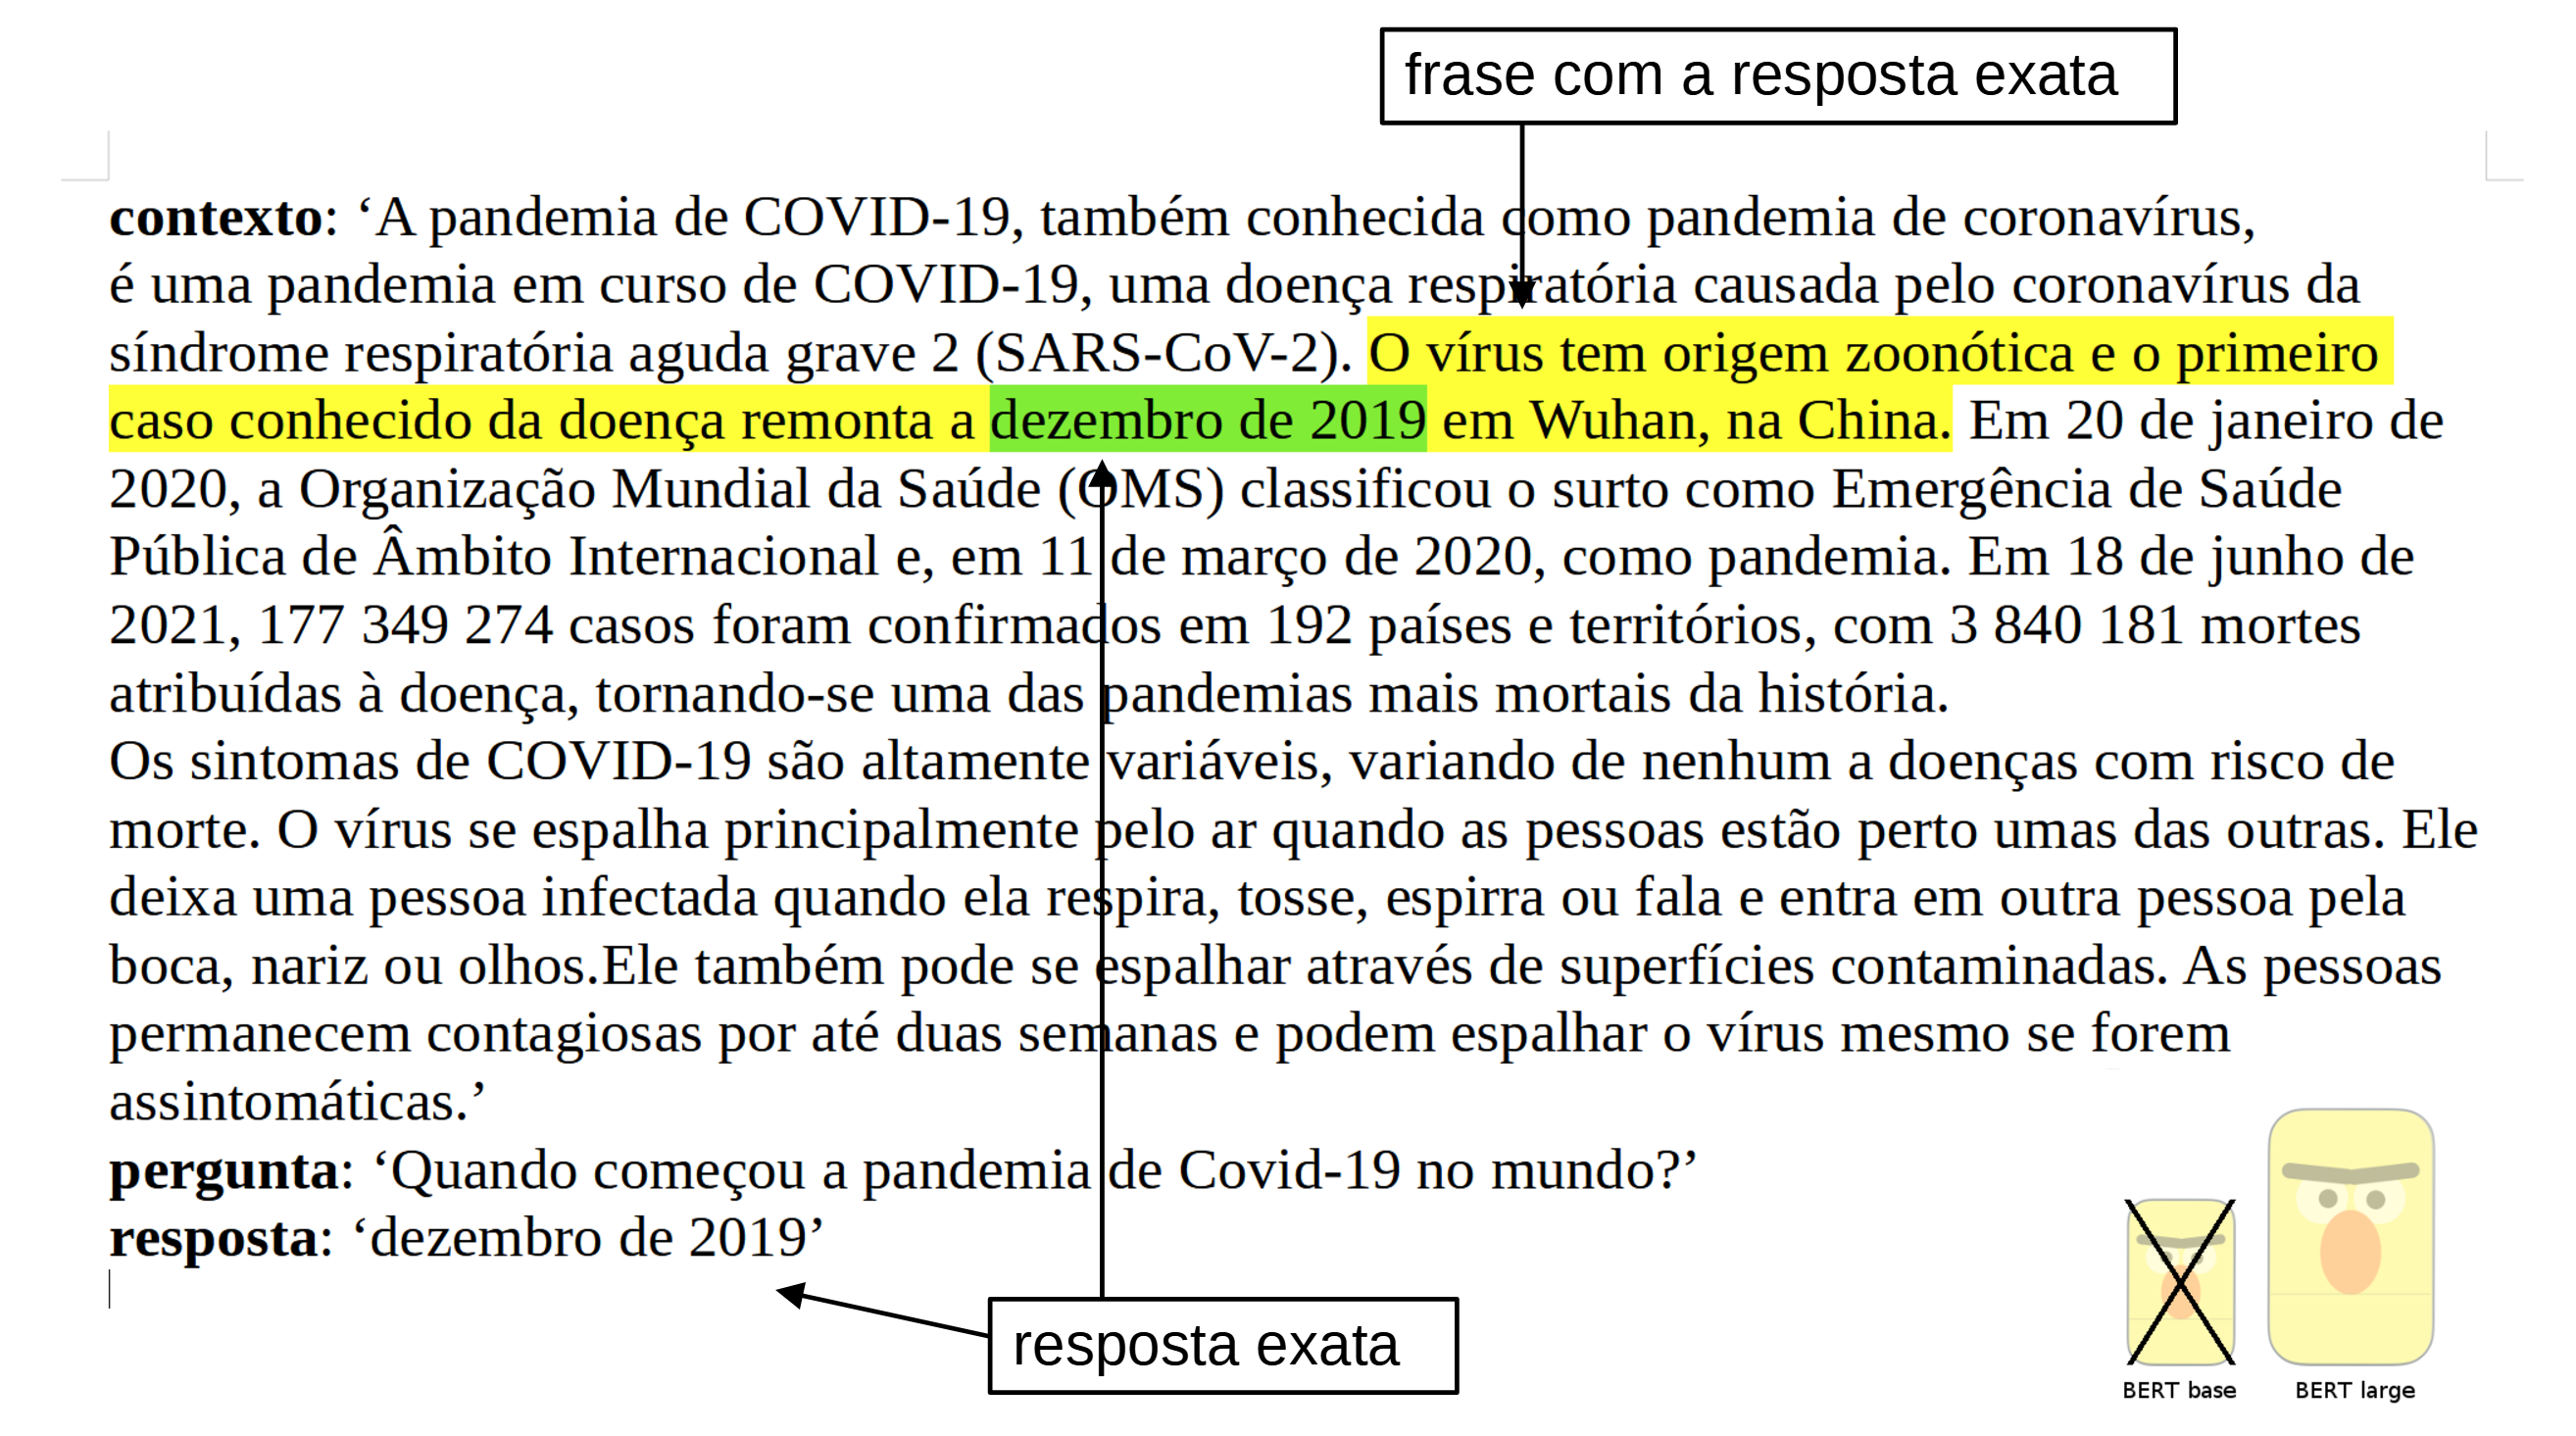

In [ ]:
question = "Quando começou a pandemia de Covid-19 no mundo?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'dezembro de 2019', score: 0.5087, start: 290, end: 306


In [ ]:
question = "Qual é a data de início da pandemia Covid-19 em todo o mundo?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}'")

Answer: 'dezembro de 2019'


In [ ]:
question = "Onde foi descoberta a Covid-19?"

result = nlp(question=question, context=context)

print(f"Answer: '{result['answer']}'")


Answer: 'Wuhan, na China'


**Modelo Básico**

In [23]:
from transformers import pipeline

qa_model = pipeline("question-answering")

question = "Where do I live?"
context = "My name is Merve and I live in İstanbul."

qa_model(question = question, context = context)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9538118243217468, 'start': 31, 'end': 39, 'answer': 'İstanbul'}

**Mais informações**:

> https://medium.com/@pierre_guillou/nlp-modelo-de-question-answering-em-qualquer-idioma-baseado-no-bert-base-estudo-de-caso-em-12093d385e78